In [1]:
# disable INFO messages (e.g. from tensorflow)

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
print("Current Directory: {}".format(os.getcwd()))

Current Directory: /home/lndr/Development/FER/Notebooks


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import numpy as np
import random
from tensorflow import keras
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [4]:
# dataset paths

afnet_img = '/home/lndr/Development/FER/AffectNet/train_set/images'
afnet_anno = '/home/lndr/Development/FER/AffectNet/train_set/annotations'

In [5]:
# emotion categories
# classes 8-10 are not facial expressions but classes of uncertainty of annotators
classes = {
    0:'neutral',
    1:'happiness',
    2:'sadness',
    3:'surprise',
    4:'fear',
    5:'disgust',
    6:'anger',
    7:'contempt',
    8:'none',
    9:'uncertain',
    10:'no-face'
}

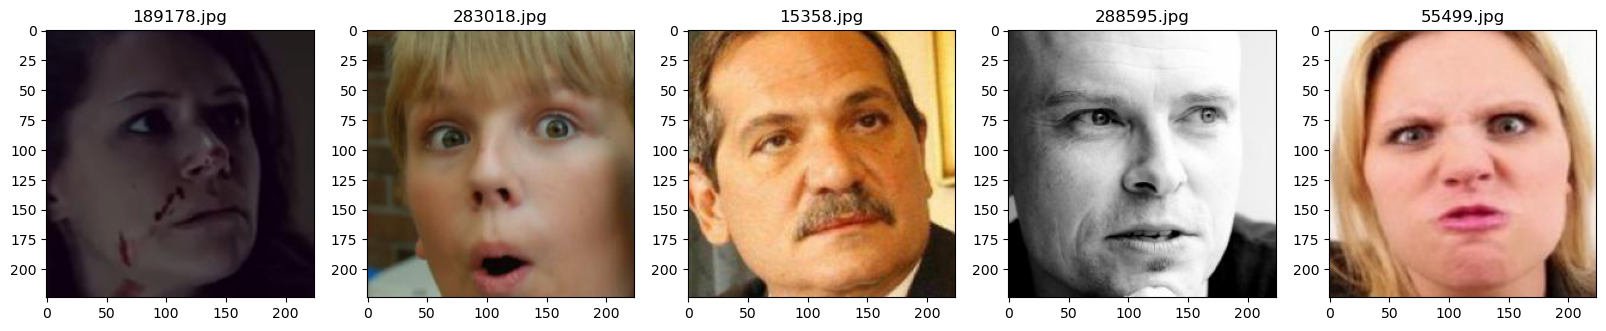

In [6]:
# select & plot random images

plt.figure(figsize=(20,20))

samples = 5
img_list = os.listdir(afnet_img) # list of all images in folder
img_list.sort(key=lambda x: int(os.path.splitext(x)[0]))  # Extract numeric prefix without file extension
img_files = [random.choice(img_list) for i in range(samples)] # random samples
img_indices = [img_list.index(img) for img in img_files] # indices 

for img_file in img_files:
    img_path = os.path.join(afnet_img, img_file)
    img = mpimg.imread(img_path)
    ax = plt.subplot(1,samples,img_files.index(img_file)+1)
    ax.title.set_text(img_file)
    plt.imshow(img)

In [7]:
print('Image indices:\t', img_indices) # print indices
print('Image files:\t', [img_list[index] for index in img_indices]) # test if indices correspond to images shown above

Image indices:	 [130938, 195887, 10678, 199775, 38489]
Image files:	 ['189178.jpg', '283018.jpg', '15358.jpg', '288595.jpg', '55499.jpg']


In [8]:
# load file list of annotations
anno_list = os.listdir(afnet_anno)
# sort list by file name (ascending)
anno_list.sort(key=lambda x: int(x.split('_')[0])) # Assumes the numeric prefix is followed by an underscore
# collect corresponding file names of annotations
anno_files = [[anno_list[img_indices[i]*4+j] for j in range(0,4)] for i in range(0,len(img_indices))]
# sort files within list
for entry in anno_files:
    entry.sort(key=lambda x: x.split('_')[1])
anno_files

[['189178_aro.npy', '189178_exp.npy', '189178_lnd.npy', '189178_val.npy'],
 ['283018_aro.npy', '283018_exp.npy', '283018_lnd.npy', '283018_val.npy'],
 ['15358_aro.npy', '15358_exp.npy', '15358_lnd.npy', '15358_val.npy'],
 ['288595_aro.npy', '288595_exp.npy', '288595_lnd.npy', '288595_val.npy'],
 ['55499_aro.npy', '55499_exp.npy', '55499_lnd.npy', '55499_val.npy']]

/home/lndr/Development/FER/AffectNet/train_set/annotations/189178_exp.npy
/home/lndr/Development/FER/AffectNet/train_set/annotations/283018_exp.npy
/home/lndr/Development/FER/AffectNet/train_set/annotations/15358_exp.npy
/home/lndr/Development/FER/AffectNet/train_set/annotations/288595_exp.npy
/home/lndr/Development/FER/AffectNet/train_set/annotations/55499_exp.npy


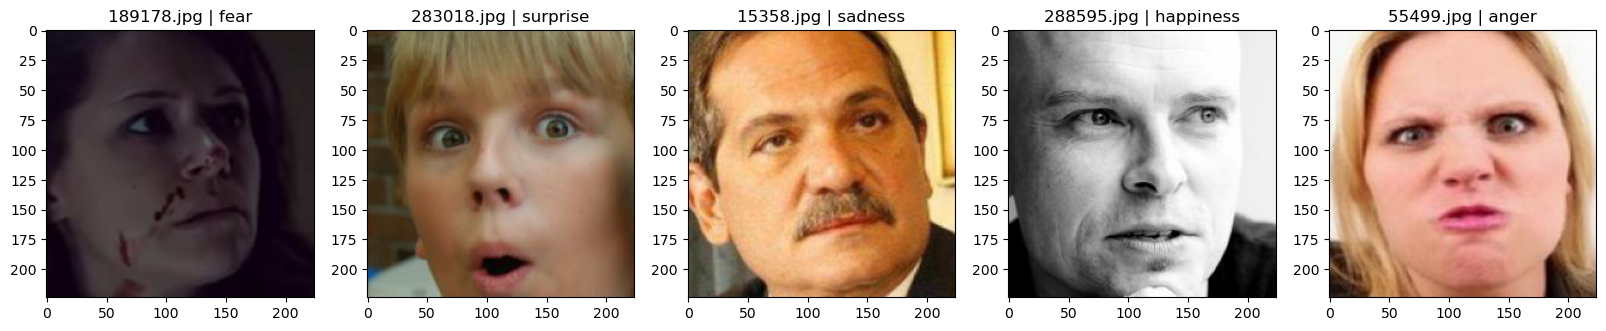

In [9]:
# Plot images again with corresponding classes
plt.figure(figsize=(20,20))
for img_file in img_files:
    img_path = os.path.join(afnet_img, img_file)
    img = mpimg.imread(img_path)
    
    anno_file_path = os.path.join(afnet_anno, anno_files[img_files.index(img_file)][1]) # index 1 is _exp.npy
    print(anno_file_path)
    exp_class = int(np.load(anno_file_path))
    expression = classes[exp_class]
    
    ax = plt.subplot(1,samples,img_files.index(img_file)+1)
    ax.title.set_text('{} | {}'.format(img_file, expression))
    plt.imshow(img)

In [10]:
# show annotation infos
for img_file in img_files:
    for i in range(4):
        file = anno_files[img_files.index(img_file)][i]
        anno_file_path = os.path.join(afnet_anno, file)
        data = np.load(anno_file_path)
        print('Info from {}:\n'.format(file), data)
        print()

Info from 189178_aro.npy:
 0.582298

Info from 189178_exp.npy:
 4

Info from 189178_lnd.npy:
 [-12.09085057 125.1372973   -9.32045977 151.24540541  -5.02583908
 175.62306306   3.42951724 198.31063063  21.0148046  216.67459459
  46.48386207 228.28828829  74.41949425 234.41297297 101.66510345
 236.20396396 126.00128736 234.90234234 143.83374713 227.69297297
 155.18822989 214.74234234 164.8022069  199.56684685 170.89397701
 182.26738739 174.10206897 162.9045045  173.85489655 143.65765766
 170.50777011 126.44900901 164.40055172 109.10918919  34.66078161
  88.81801802  46.74133333  75.66054054  63.72413793  67.32108108
  82.58133333  66.16072072  98.44671264  71.2763964  123.09701149
  69.14738739 132.73158621  63.95099099 142.9943908   61.57981982
 151.65572414  64.41513514 156.53737931  73.14306306 114.89397701
  90.9218018  120.18758621 101.25405405 126.23816092 111.0818018
 132.70068966 121.23243243 105.01222989 142.55279279 116.72202299
 143.86954955 127.42767816 144.52540541 135.08487